In [1]:
!pip install pandas matplotlib seaborn


In [3]:
from google.colab import drive
import pandas as pd

# Google Drive'a bağlan
drive.mount('/content/drive')

# Veri setini yükleme
df = pd.read_csv('/content/drive/MyDrive/25.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Veri setinin temel istatistiklerini görüntüleme
print(df.describe())

# Veri setinin bilgilerini görüntüleme
print(df.info())


        step_count        mood  calories_burned  hours_of_sleep  \
count    96.000000   96.000000        96.000000        96.00000   
mean   2935.937500  211.458333        93.447917         5.21875   
std    2143.384573   84.442184        71.601951         1.51625   
min      25.000000  100.000000         0.000000         2.00000   
25%     741.000000  100.000000        21.750000         4.00000   
50%    2987.500000  200.000000        96.000000         5.00000   
75%    4546.250000  300.000000       149.250000         6.00000   
max    7422.000000  300.000000       243.000000         9.00000   

       bool_of_active  weight_kg  
count       96.000000  96.000000  
mean       218.750000  64.281250  
std        249.341237   0.627495  
min          0.000000  64.000000  
25%          0.000000  64.000000  
50%          0.000000  64.000000  
75%        500.000000  64.000000  
max        500.000000  66.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data column

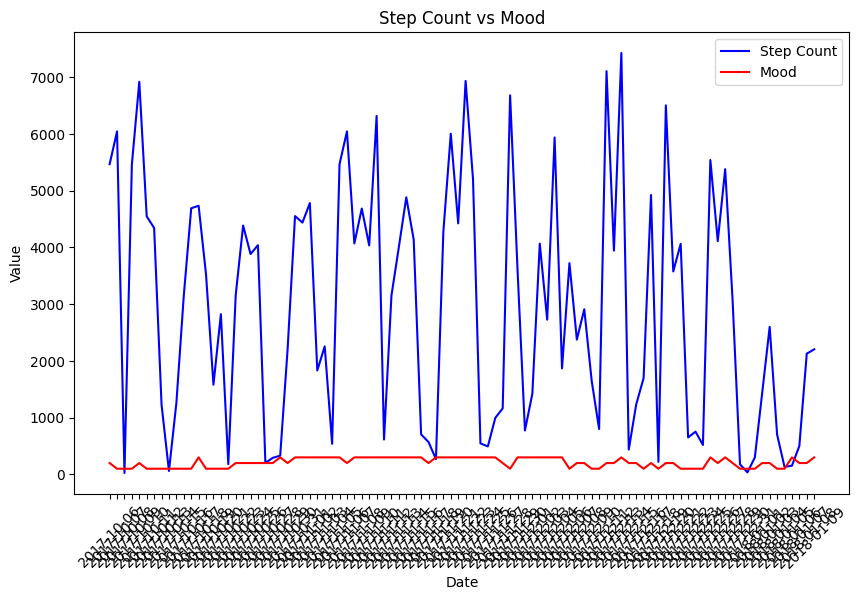

In [12]:
import matplotlib.pyplot as plt

# Adım sayısı ve ruh hali arasındaki ilişkiyi gösteren çizgi grafiği
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['step_count'], label='Step Count', color='blue')
plt.plot(df['date'], df['mood'], label='Mood', color='red')
plt.title('Step Count vs Mood')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()


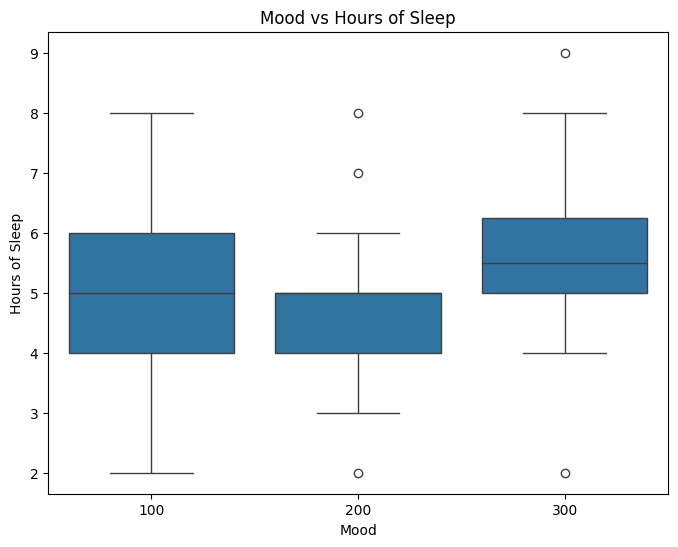

In [13]:
import seaborn as sns

# Ruh hali ve uyku süresi arasındaki ilişkiyi gösteren kutu grafiği
plt.figure(figsize=(8, 6))
sns.boxplot(x='mood', y='hours_of_sleep', data=df)
plt.title('Mood vs Hours of Sleep')
plt.xlabel('Mood')
plt.ylabel('Hours of Sleep')
plt.show()


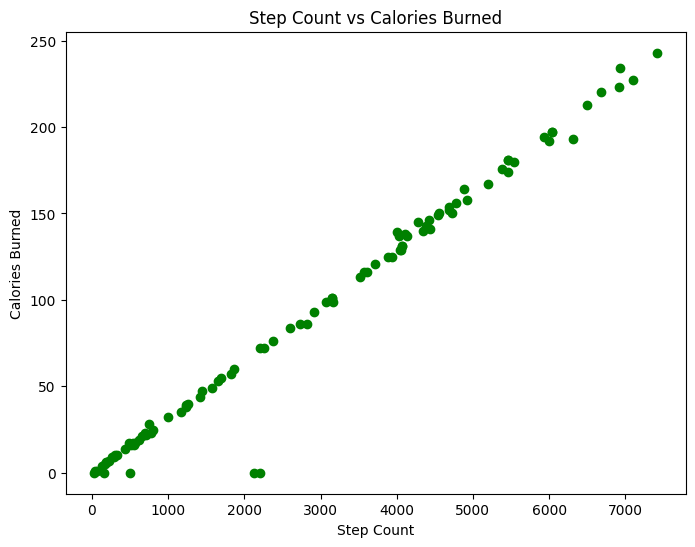

In [14]:
# Adım sayısı ve yakılan kalori arasındaki ilişkiyi gösteren dağılım grafiği
plt.figure(figsize=(8, 6))
plt.scatter(df['step_count'], df['calories_burned'], color='green')
plt.title('Step Count vs Calories Burned')
plt.xlabel('Step Count')
plt.ylabel('Calories Burned')
plt.show()


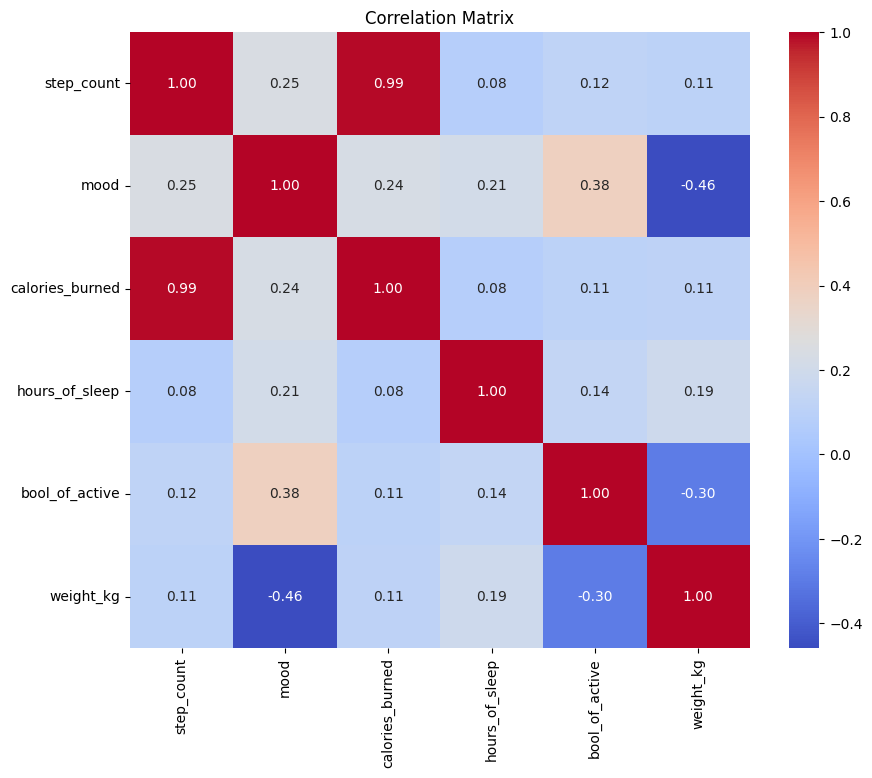

In [16]:
import seaborn as sns

# "date" sütununu kaldırma
numeric_df = df.drop(columns=['date'])

# Korelasyon matrisi
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



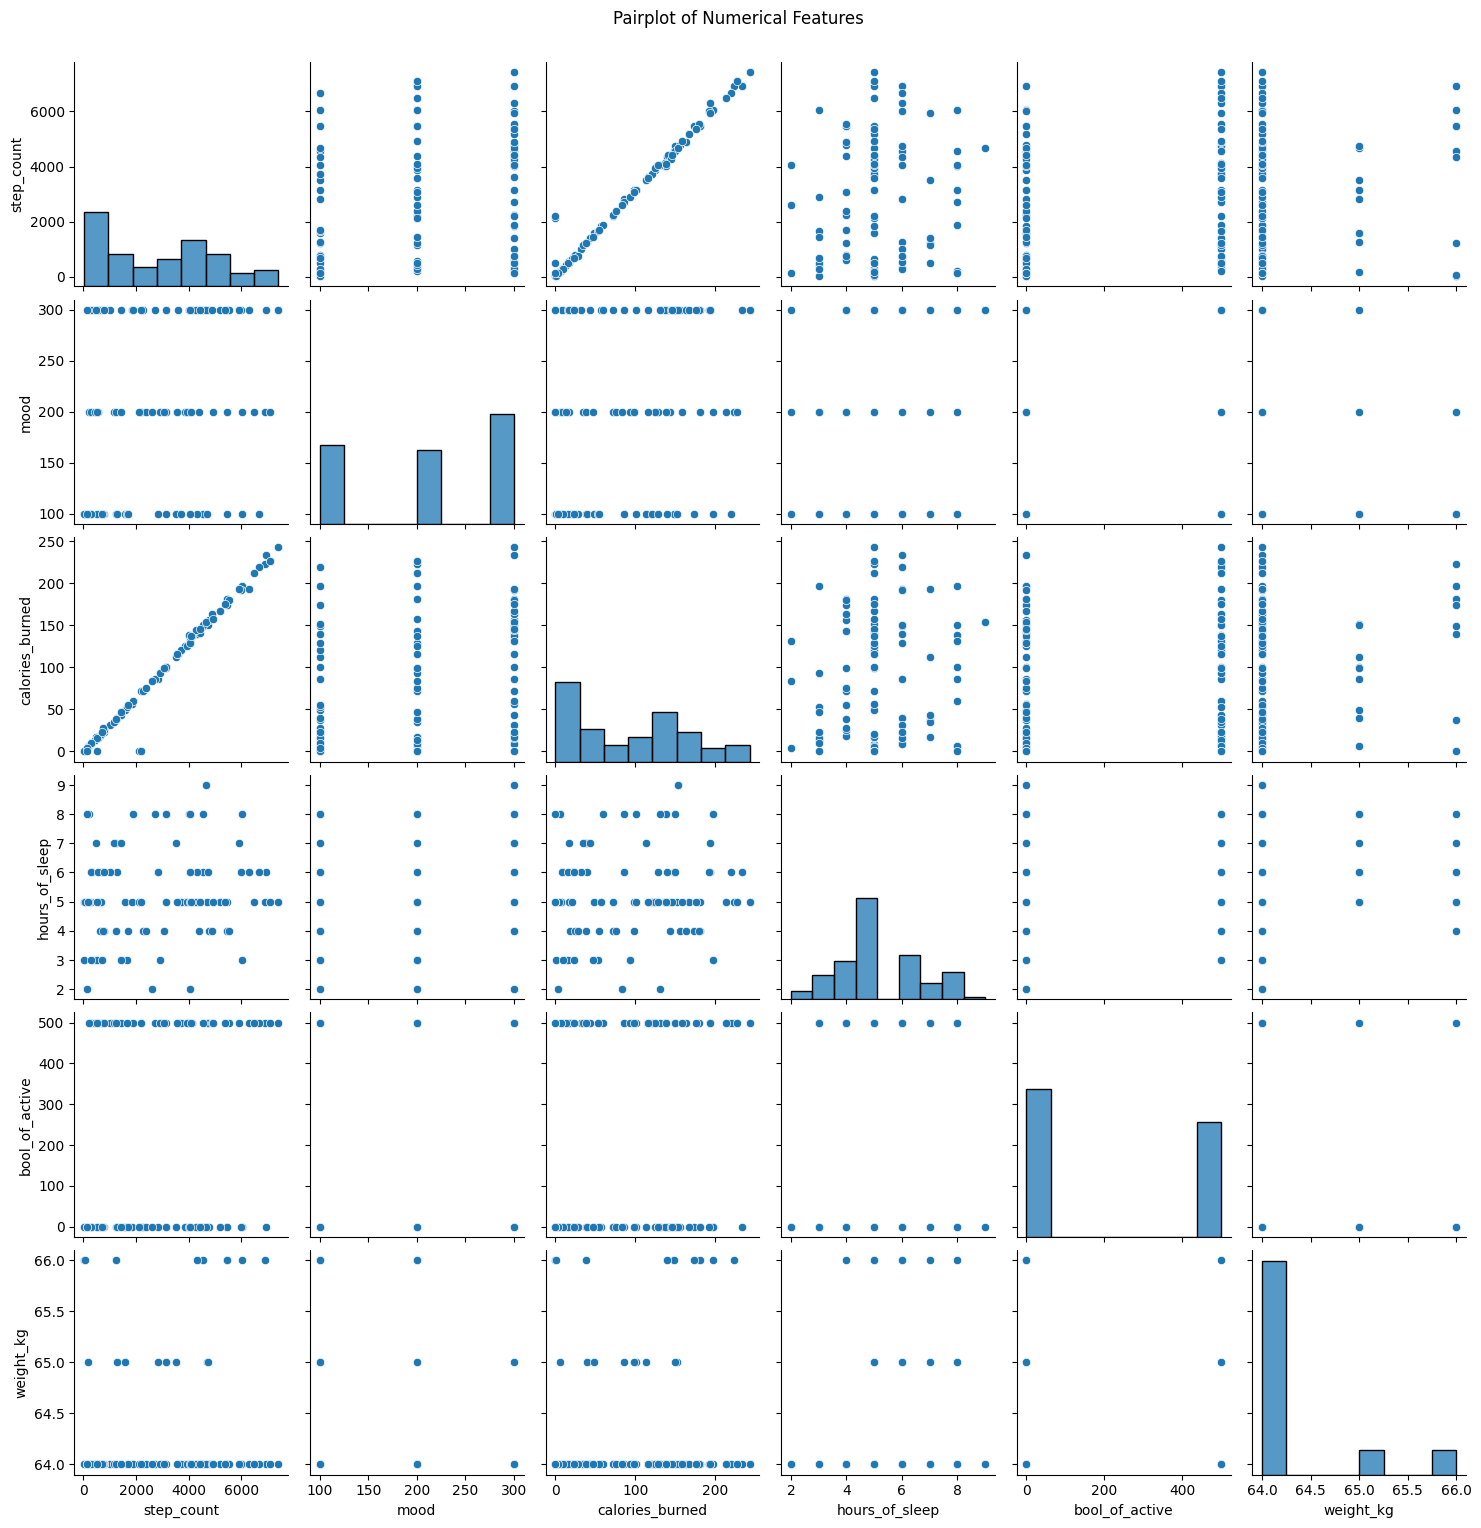

In [17]:
# Dağılım matrisi
sns.pairplot(numeric_df)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


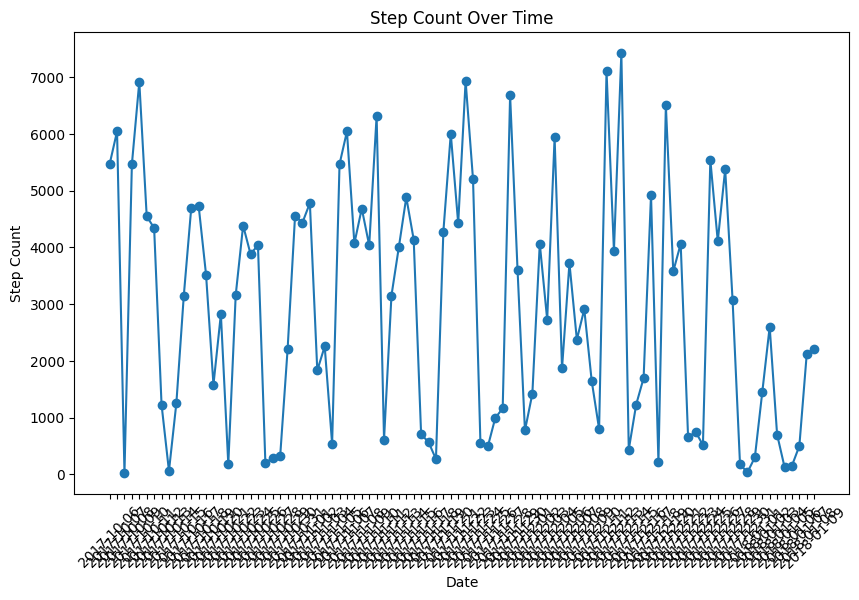

In [18]:
# Zaman serisi verileri gösteren çizgi grafiği
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['step_count'], marker='o', linestyle='-')
plt.title('Step Count Over Time')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.xticks(rotation=45)
plt.show()


In [20]:
# Eksik değerlerin sayısını kontrol etme
print(df.isnull().sum())


date               0
step_count         0
mood               0
calories_burned    0
hours_of_sleep     0
bool_of_active     0
weight_kg          0
dtype: int64


Eksik değer yok.


Kategorik değişkenlerim olmadığı için dönüşüm yapmadım.


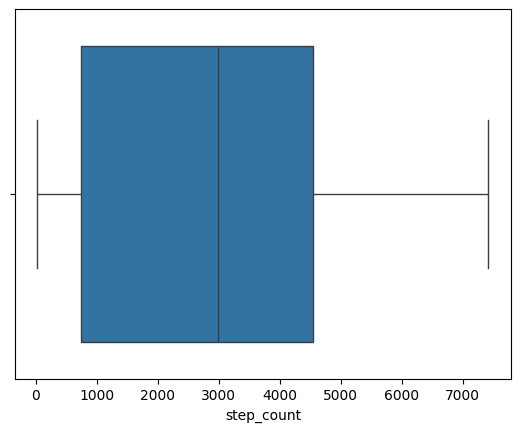

In [21]:
# Aykırı değerleri kontrol etme ve düzeltme
# Örneğin, "step_count" sütunundaki aykırı değerleri kontrol edelim
sns.boxplot(x=df['step_count'])
plt.show()
# Yukarıdaki çizgi grafiğinden aykırı değerlerin olduğunu görebiliriz.
# Aykırı değerleri belirli bir eşik değerinden büyük olanları düşürebiliriz
threshold = 10000  # Örnek bir eşik değeri
df = df[df['step_count'] <= threshold]


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Min-max normalizasyonu
scaler = MinMaxScaler()
numeric_cols = ['step_count', 'mood', 'calories_burned', 'hours_of_sleep', 'bool_of_active', 'weight_kg']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [26]:
from sklearn.model_selection import train_test_split

# Bağımsız değişkenler ve hedef değişkeni belirleme
X = df.drop(columns=['step_count'])  # 'step_count' sütununu bağımsız değişkenlerden çıkarıyoruz
y = df['step_count']  # 'step_count' sütunu hedef değişken olacak

# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test kümelerinin boyutlarını kontrol etme
print("Eğitim veri seti boyutu:", X_train.shape)
print("Test veri seti boyutu:", X_test.shape)




Eğitim veri seti boyutu: (76, 6)
Test veri seti boyutu: (20, 6)


Random Forest Regresyon modeini seçtim


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


Modeli içe aktardım

In [29]:
# "date" sütununu veri setinden çıkarma
X_train = X_train.drop(columns=['date'])
X_test = X_test.drop(columns=['date'])

# Random Forest Regresyon modelini oluşturma
rf_regressor = RandomForestRegressor(random_state=42)

# Modeli eğitme
rf_regressor.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [30]:
# Eğitim veri seti üzerinde tahmin yapma
y_train_pred = rf_regressor.predict(X_train)

# Test veri seti üzerinde tahmin yapma
y_test_pred = rf_regressor.predict(X_test)

# Eğitim ve test verileri için hata metriklerini hesaplama
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Eğitim Seti Ortalama Kare Hatası:", train_mse)
print("Test Seti Ortalama Kare Hatası:", test_mse)
print("Eğitim Seti Ortalama Mutlak Hata:", train_mae)
print("Test Seti Ortalama Mutlak Hata:", test_mae)


Eğitim Seti Ortalama Kare Hatası: 0.0001987538902723064
Test Seti Ortalama Kare Hatası: 0.0032840385350549604
Eğitim Seti Ortalama Mutlak Hata: 0.007156315149100265
Test Seti Ortalama Mutlak Hata: 0.024946532377991097


Lineer Regresyon modelini seçtim

In [31]:
from sklearn.linear_model import LinearRegression


Modeli içe aktardım

In [32]:
# Lineer Regresyon modelini oluşturma
linear_regressor = LinearRegression()

# Modeli eğitme
linear_regressor.fit(X_train, y_train)


LinearRegression()

In [33]:
# Eğitim veri seti üzerinde tahmin yapma
y_train_pred = linear_regressor.predict(X_train)

# Test veri seti üzerinde tahmin yapma
y_test_pred = linear_regressor.predict(X_test)

# Eğitim ve test verileri için hata metriklerini hesaplama
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Eğitim Seti Ortalama Kare Hatası:", train_mse)
print("Test Seti Ortalama Kare Hatası:", test_mse)
print("Eğitim Seti Ortalama Mutlak Hata:", train_mae)
print("Test Seti Ortalama Mutlak Hata:", test_mae)


Eğitim Seti Ortalama Kare Hatası: 0.0011973282206236586
Test Seti Ortalama Kare Hatası: 0.003992300034749223
Eğitim Seti Ortalama Mutlak Hata: 0.01582165934061744
Test Seti Ortalama Mutlak Hata: 0.023405950673249278


Lineer R. modelini seçtim.

In [44]:
from sklearn.model_selection import GridSearchCV

# Grid Search için parametrelerin tanımlanması
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Grid Search modeli oluşturma
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Grid Search modelini eğitme
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi skoru görüntüleme
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)



En iyi parametreler: {'copy_X': True, 'fit_intercept': False}
En iyi skor: -0.0014481374292837038


Hiper parametreleri Grid Search ile optimize ettim.

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Modelin tahminlerini yapma
y_pred = grid_search.predict(X_test)

# Ortalama Kare Hata (Mean Squared Error - MSE)
mse = mean_squared_error(y_test, y_pred)
print("Ortalama Kare Hata (MSE):", mse)

# Ortalama Mutlak Hata (Mean Absolute Error - MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Ortalama Mutlak Hata (MAE):", mae)

# R-Kare (R-squared)
r2 = r2_score(y_test, y_pred)
print("R-Kare (R-squared):", r2)


Ortalama Kare Hata (MSE): 0.00408056630368735
Ortalama Mutlak Hata (MAE): 0.02409530192684422
R-Kare (R-squared): 0.9558204686062874


MSE,MAE ve  R-Kare ile modeli değerlendirdim.